# Testing the possibilities of `karateclub` library 

### Graph embeddings

In [156]:
import networkx as nx
from karateclub import DeepWalk
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.manifold import TSNE

In [44]:
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':12})
rc('mathtext',**{'default':'regular'})

%config InlineBackend.figure_format = 'retina'

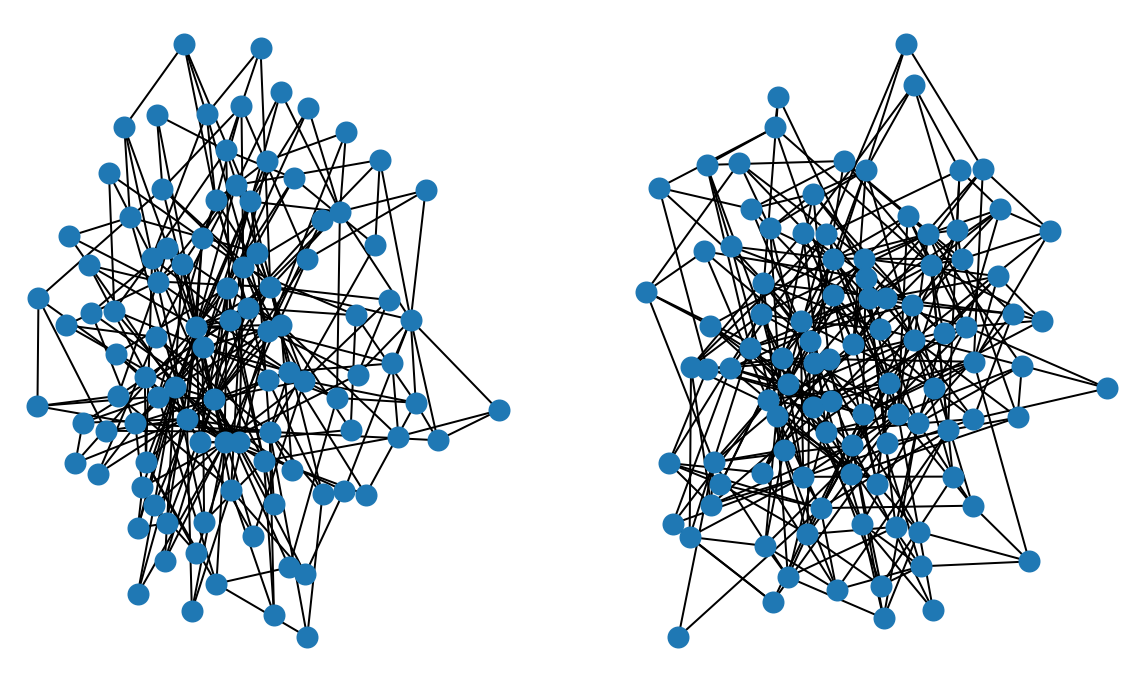

In [192]:
ba = nx.barabasi_albert_graph(100, 3)
er = nx.erdos_renyi_graph(100, 0.06)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
layout = nx.spring_layout(ba, iterations=200)
nx.draw(ba, layout=layout, node_size=100)

plt.subplot(1, 2, 2)
layout = nx.spring_layout(er, iterations=200)
nx.draw(er, layout=layout, node_size=100)

In [193]:
model = DeepWalk(walk_number=20, dimensions=2)

model.fit(ba)
embeddings_ba = model.get_embedding()

model.fit(er)
embeddings_er = model.get_embedding()

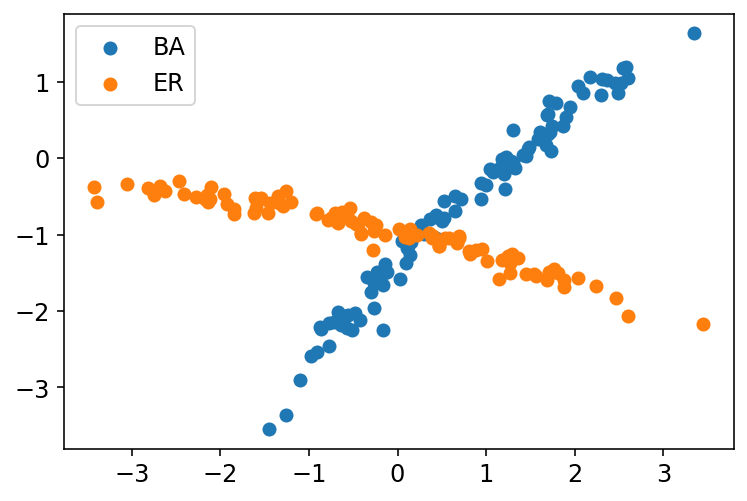

In [194]:
plt.scatter(embeddings_ba[:, 0], embeddings_ba[:, 1], label='BA')
plt.scatter(embeddings_er[:, 0], embeddings_er[:, 1], label='ER')
plt.legend()
plt.show()

**Karate network**

In [73]:
karate = nx.karate_club_graph()

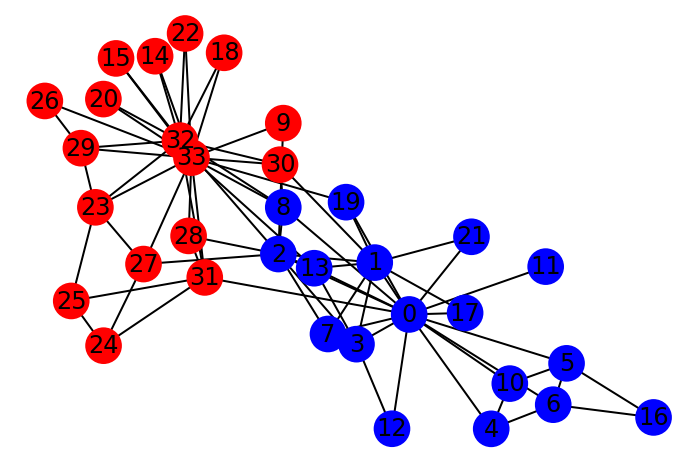

In [74]:
club = ['blue' if club == 'Mr. Hi' else 'red' for club in nx.get_node_attributes(karate, 'club').values()]
nx.draw_networkx(karate, node_color=club)
plt.axis('off')
plt.show()

In [96]:
model = DeepWalk(dimensions=2)
model.fit(karate)

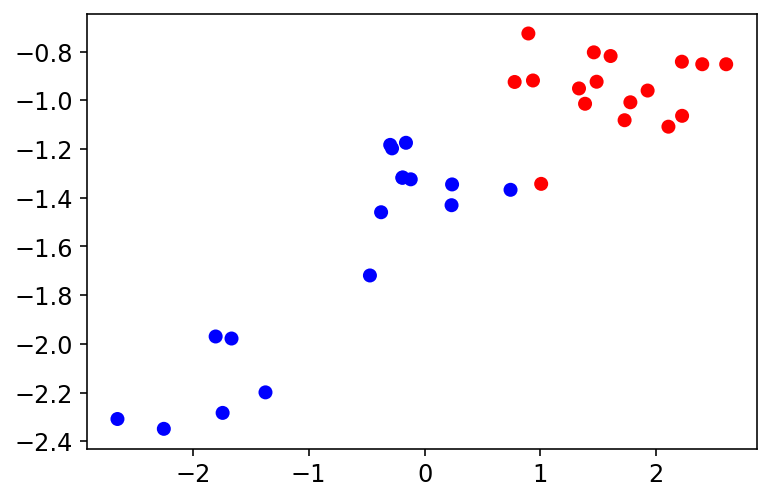

In [97]:
embeddings = model.get_embedding()
plt.scatter(embeddings[:, 0], embeddings[:, 1], color=club)
plt.show()

### Community detection

In [103]:
from karateclub import GraphReader, LabelPropagation

reader = GraphReader('facebook')

graph = reader.get_graph()
target = reader.get_target()

In [109]:
model = LabelPropagation()
model.fit(graph)
cluster_memberships = model.get_memberships()

In [121]:
from sklearn.metrics.cluster import normalized_mutual_info_score

cluster_memberships = [cluster_memberships[node] for node in range(len(cluster_memberships))]

nmi = normalized_mutual_info_score(target, cluster_memberships)

In [123]:
print(f'NMI = {nmi}')

NMI = 0.263391086302391


In [147]:
graph = nx.karate_club_graph()

model = LabelPropagation()
model.fit(graph)
cluster_membership = model.get_memberships()

In [148]:
cluster_membership = [cluster_membership[node] for node in range(len(cluster_membership))]

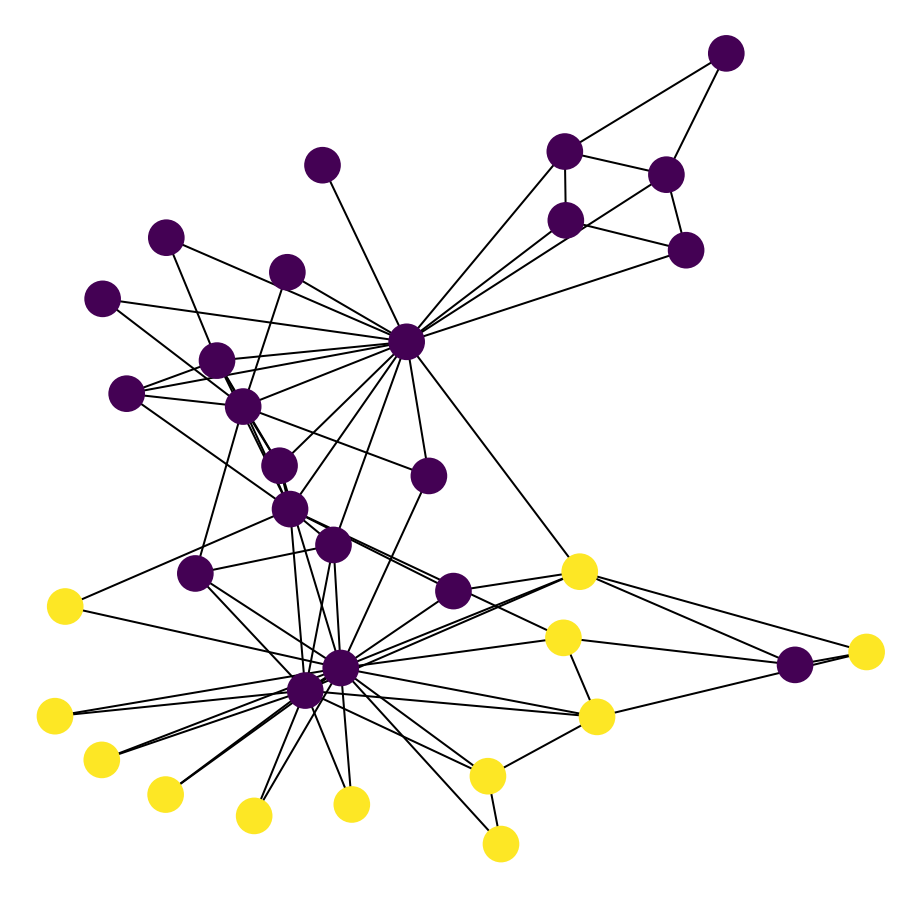

In [149]:
plt.figure(figsize=(8, 8))
nx.draw_networkx(graph, node_color=cluster_membership, with_labels=False)
plt.axis('off')
plt.show()

In [162]:
np.sum(np.array(cluster_membership) ==  np.array([0 if c == 'blue' else 20 for c in club])) / len(cluster_membership)

0.8529411764705882